# RETICULOCYTE COUNT TEST USING SSD RESNET 50 DEFAULT CONFIG

### PERFORM GDRIVE MOUNTING AND CLONE THE REPOSITORY

This is a collaboratory notebook for training SSD ResNet model. It has got the scripts to create confusion matrix and count per classes, also it has custom script to pereform following postprocessing Tests.

1. Duplicate Object removal
2. Partial Object removal


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/TensorFlow'

/content/gdrive/My Drive/TensorFlow


In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 58094, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 58094 (delta 111), reused 248 (delta 96), pack-reused 57831
Receiving objects: 100% (58094/58094), 572.96 MiB | 14.95 MiB/s, done.
Resolving deltas: 100% (40234/40234), done.
Checking out files: 100% (2480/2480), done.


### INSTALL AND SETUP OBJECT DETECTION TF MODEL ZOO

In [3]:
!apt-get install protobuf-compiler python-lxml python-pil
!pip install Cython pandas tf-slim lvis

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 40 not upgraded.
Need to get 1,614 kB of archives.
After this operation, 8,908 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4 all 4.6.0-1 [67.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pkg-resources all 39.0.1-2 [128 kB]
Get:3 http:/

In [4]:
%cd '/content/gdrive/My Drive/TensorFlow/models/research/'
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/My Drive/TensorFlow/models/research


In [5]:
import os
import sys
os.environ['PYTHONPATH']+=":/content/gdrive/My Drive/TensorFlow/models"
sys.path.append("/content/gdrive/My Drive/TensorFlow/models/research")

In [6]:
pwd

'/content/gdrive/My Drive/TensorFlow/models/research'

In [7]:
%%bash
cp object_detection/packages/tf2/setup.py .
python setup.py build
python setup.py install

running build
running build_py
copying object_detection/protos/anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/bipartite_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/argmax_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/eval_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_predictor_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/calibration_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/center_net_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/flexible_grid_anchor_generator_pb2.py -> 

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-37: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-37: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-37: module MAY be using inspect.stack
zip_safe flag not set; analyzing archive contents...
zip_safe flag not set; analyzing archive contents...
cpuinfo.__pycache__.cpuinfo.cpython-37: module references __file__
cpuinfo.__pycache__.cpuinfo.cpython-37: module MAY be using inspect.stack
cpuinfo.__pycache__.cpuinfo.cpython-37: module MAY be using inspect.trace
zip_safe flag not set; analyzing archive contents...
future.backports.test.__pycache__.ssl_servers.cpython-37: module references __file__
future.backports.test.__pycache__.support.cpython-37: module references __file__
future.standard_library.__pycache__.__init__.cpython-37: module references __file__
future.standard_library.__pycache__.__init__

In [8]:
%%bash
python -m pip install .

Processing /content/gdrive/My Drive/TensorFlow/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=21856155 sha256=2f7e443cc8a86d58c8f367e4b5bed82194b8c4be34c78a4465f35326d334fef3
  Stored in directory: /tmp/pip-ephem-wheel-cache-zb3gp3xz/wheels/2d/dd/8d/7f002eb6552302efe58eb9724989cba886f69f5a4d6164b5eb
  Created wheel for avro-python3: filename=avro_python3-1.9.2.1-py3-none-any.whl size=43512 sha256=9fff62bdcb0e17c15d888ccde4d41ccb919e3c48704c5a538bf9a1e5128dab88
  Stored in directory: /root/.cache/pip/wheels/bc/49/5f/fdb5b9d85055c478213e0158ac122b596816149a02d82e0ab1
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78544 sha256=6f791a8ba61c1e15081215e553cdd798716300229994a2968670469dd093714a
  Stored in directory: /root/.cache/pip/wheels/a4/61/fd/c57e374e580aa78a45ed78d5859b3a44436af17e22ca53284f
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=4615d2d5577acc1c26514983941

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
multiprocess 0.70.12.2 requires dill>=0.3.4, but you have dill 0.3.1.1 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


### TEST THE INSTALLATION

In [9]:
%cd '/content/gdrive/My Drive/TensorFlow/models/research/object_detection/builders/'
!python model_builder_tf2_test.py
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
print('Done')

/content/gdrive/My Drive/TensorFlow/models/research/object_detection/builders
2021-07-31 08:26:54.310552: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.11: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-07-31 08:27:09.440218: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-31 08:27:09.512964: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-31 08:27:09.513925: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-07-31 

### GENERATE THE TRAINING AND TEST TF RECORDS

In [ ]:
#cd into preprocessing directory
%cd '/content/gdrive/My Drive/TensorFlow/scripts/preprocessing'
#run the cell to generate test.record and train.record
!python generate_tfrecord.py -x '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/train' -l '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt' -o '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/train.record'
!python generate_tfrecord.py -x '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/test' -l '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt' -o '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/test.record'

/content/gdrive/My Drive/TensorFlow/scripts/preprocessing
Successfully created the TFRecord file: /content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/train.record
Successfully created the TFRecord file: /content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/test.record


In [ ]:
#cd into training_demo
%cd '/content/gdrive/My Drive/TensorFlow/workspace/training_demo'
#start the Tensorboard
%load_ext tensorboard
%tensorboard --logdir=models/my_ssd_resnet50_v1_fpn

In [10]:
%cd '/content/gdrive/My Drive/TensorFlow/workspace/training_demo'

/content/gdrive/My Drive/TensorFlow/workspace/training_demo


### PERFORM TRAINING

In [ ]:
!python model_main_tf2.py --model_dir=models/my_ssd_resnet50_v1_fpn --pipeline_config_path=models/my_ssd_resnet50_v1_fpn/pipeline.config

### PERFORM INFERENCE

In [11]:
!python model_main_tf2.py --model_dir=models/my_ssd_resnet50_v1_fpn --pipeline_config_path=models/my_ssd_resnet50_v1_fpn/pipeline.config --checkpoint_dir=models/my_ssd_resnet50_v1_fpn

2021-07-31 08:28:16.503528: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
W0731 08:28:27.974717 140648044406656 model_lib_v2.py:1081] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0731 08:28:27.975076 140648044406656 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0731 08:28:27.975232 140648044406656 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0731 08:28:27.975376 140648044406656 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0731 08:28:27.975586 140648044406656 model_lib_v2.py:1102] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-07-31 08:28:27.980435: I tensorflow/stream_executor/

### EXPORT TRAINED MODEL CHECKPOINTS

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path ./models/my_ssd_resnet50_v1_fpn/pipeline.config --trained_checkpoint_dir ./models/my_ssd_resnet50_v1_fpn/ --output_directory ./exported-models/my_model_ssd_resnet

2021-07-06 03:53:17.596613: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-06 03:53:20.619896: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-06 03:53:20.642677: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-06 03:53:20.643283: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-07-06 03:53:20.643341: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-06 03:53:20.646067: I tensorflow/stream_executor/plat

In [12]:
import tensorflow as tf
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL="/content/gdrive/My Drive/TensorFlow/workspace/training_demo/exported-models/my_model_ssd_resnet/saved_model"

print('Loading model...', end='')

# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)

print('Done!')

Loading model...Done!


Load the dictionary containing category details this is needed for inference

In [13]:
category_index=label_map_util.create_category_index_from_labelmap("/content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt",use_display_name=True)

In [14]:
img=['/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/test/000061.jpg','/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/test/000657.jpg']
print(img)

['/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/test/000061.jpg', '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/test/000657.jpg']


Below method will perform detection on single image

Running inference for /content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/test/000061.jpg... Done


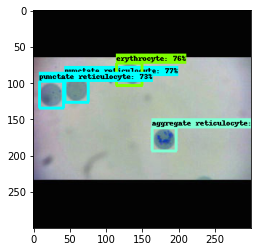

Running inference for /content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/test/000657.jpg... Done


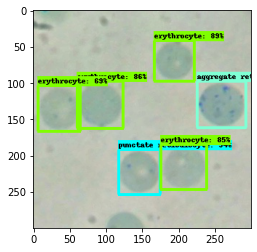

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

for image_path in img:

    print('Running inference for {}... '.format(image_path), end='')
    image_np=load_image_into_numpy_array(image_path)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor=tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor=input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections=detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections=int(detections.pop('num_detections'))
    detections={key:value[0,:num_detections].numpy()
                   for key,value in detections.items()}
    #print("NUM Detections:", num_detections)
    detections['num_detections']=num_detections

    # detection_classes should be ints.
    detections['detection_classes']=detections['detection_classes'].astype(np.int64)
    #print(detections['detection_classes'])
    image_np_with_detections=image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,     #max number of bounding boxes in the image
          min_score_thresh=.49,      #min prediction threshold
          agnostic_mode=False)
    %matplotlib inline
    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
    plt.show()

### IMPORT POSTPROCESSING UTILS

In [16]:
import EvaluationUtils as EvalUtils

base_dir = '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/test/'
bbox_df, image_files_list, label_files_list = EvalUtils.retrieve_bounding_box_details(base_dir)

In [17]:
image_files_list_sort = sorted(image_files_list)
len(image_files_list)

109

### INTEGRATED SCRIPT TO PERFORM DETECTION, COUNTING AND GENERATING CONFUSION MATRIX

In [18]:
import pandas as pd
import numpy as np
import cv2 as cv
def generate_matrices(min_score_thresh=.50, 
                      check_duplicate = False, 
                      check_partial_detection = False):
    eval_output_list = []
    for image_path in image_files_list_sort:
        image_name = image_path
        image_path = base_dir+ image_path
        cur_img = cv.imread(image_path)
        image_np=load_image_into_numpy_array(image_path)

        # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
        input_tensor=tf.convert_to_tensor(image_np)
        # The model expects a batch of images, so add an axis with `tf.newaxis`.
        input_tensor=input_tensor[tf.newaxis, ...]

        # input_tensor = np.expand_dims(image_np, 0)
        detections=detect_fn(input_tensor)

        # All outputs are batches tensors.
        # Convert to numpy arrays, and take index [0] to remove the batch dimension.
        # We're only interested in the first num_detections.
        num_detections=int(detections.pop('num_detections'))
        detections={key:value[0,:num_detections].numpy() for key,value in detections.items()}
        detections['num_detections']=num_detections

        # detection_classes should be ints.
        detections['detection_classes']=detections['detection_classes'].astype(np.int64)
        image_np_with_detections=image_np.copy()
        scores = [x for x in detections['detection_scores'] if x > min_score_thresh]
        detection_num = len(scores)
        det_boxs = detections['detection_boxes'][:detection_num]
        det_class = detections['detection_classes'][:detection_num]
        det_class_category = [category_index[x]['name'] for x in det_class]
        if (check_duplicate == True) and (det_boxs is not None) and (len(det_boxs)>0):
            det_boxs, det_class_category = EvalUtils.detect_duplicate_boxes(det_boxs, det_class_category)
            detection_num = len(det_class_category)
        if (check_partial_detection == True) and (det_boxs is not None) and (len(det_boxs)>0):
            det_boxs, det_class_category = EvalUtils.remove_partial_detections(cur_img, det_boxs, det_class_category)
            detection_num = len(det_class_category)
        bbox_file = bbox_df[bbox_df.filename == image_name]
        actual_aggregates = len(bbox_file[bbox_file['class'] == 'aggregate reticulocyte'])
        actual_punctate = len(bbox_file[bbox_file['class'] == 'punctate reticulocyte'])
        actual_erythrocyte = len(bbox_file[bbox_file['class'] == 'erythrocyte'])
        num_Actuals = len(bbox_file)

        bb_final_selection = bbox_file[['xmin', 'ymin', 'xmax', 'ymax', 'class']]
        bb_final_selection['match_found'] = 0
        list_bbox = bb_final_selection.values.tolist()
        Aggregate = 0
        Punctate = 0
        Erythrocyte = 0
        TP_Aggregate = 0
        TP_Punctate = 0
        TP_Erythrocyte = 0
        FP_Aggregate = 0
        FP_Punctate = 0
        FP_Erythrocyte = 0
        FN_Aggregate = 0
        FN_Punctate = 0
        FN_Erythrocyte = 0
        FP_Aggregate_TP_Punctate = 0
        FP_Aggregate_TP_Erythrocyte = 0
        FP_Punctate_TP_Aggregate = 0
        FP_Punctate_TP_Erythrocyte = 0
        FP_Erythrocyte_TP_Aggregate = 0
        FP_Erythrocyte_TP_Punctate = 0
        NoMatch = 0
        for box_category in zip(det_boxs, det_class_category):
            box, category = box_category[0], box_category[1]
            #matching_box = list_bbox[0]
            IoU = 0
            bbox_index = 0
            for ind, actuals in enumerate(list_bbox):
                # Only check intersection with those boxes which are not yet matched
                # actuals[5] correspond to match_found column
                if actuals[5] == 0:
                    curIoU = EvalUtils.compute_IOU_score(actuals[:4], box)
                    if(curIoU > IoU):
                        bbox_index = ind
                        IoU = curIoU
            if category == 'aggregate reticulocyte':
                Aggregate = Aggregate+1
            elif category == 'punctate reticulocyte':
                Punctate = Punctate+1
            elif category == 'erythrocyte':
                Erythrocyte = Erythrocyte+1  
            # If the dtectected category ->category
            # Actual category <-list_bbox[bbox_index][4]
            # If both are same its a True Positive Detection, Good
            if (IoU > 0):
                #Setting indication that this box is already found a match with label having higher score
                list_bbox[bbox_index][5] = 1
                actual_category = list_bbox[bbox_index][4]
                if actual_category == category:
                    if category == 'aggregate reticulocyte':
                        TP_Aggregate = TP_Aggregate+1
                    elif category == 'punctate reticulocyte':
                        TP_Punctate = TP_Punctate+1
                    elif category == 'erythrocyte':
                        TP_Erythrocyte = TP_Erythrocyte+1  
                else:
                    # Else is for FP detections           
                    if category == 'aggregate reticulocyte' and actual_category == 'punctate reticulocyte':
                        FP_Aggregate_TP_Punctate = FP_Aggregate_TP_Punctate + 1
                    if category == 'aggregate reticulocyte' and actual_category == 'erythrocyte':
                        FP_Aggregate_TP_Erythrocyte = FP_Aggregate_TP_Erythrocyte + 1
                    if category == 'punctate reticulocyte' and actual_category == 'aggregate reticulocyte':
                        FP_Punctate_TP_Aggregate = FP_Punctate_TP_Aggregate + 1
                    if category == 'punctate reticulocyte' and actual_category == 'erythrocyte':
                        FP_Punctate_TP_Erythrocyte = FP_Punctate_TP_Erythrocyte + 1
                    elif category == 'erythrocyte' and actual_category == 'aggregate reticulocyte':
                        FP_Erythrocyte_TP_Aggregate = FP_Erythrocyte_TP_Aggregate + 1
                    elif category == 'erythrocyte' and actual_category == 'punctate reticulocyte':
                        FP_Erythrocyte_TP_Punctate = FP_Erythrocyte_TP_Punctate + 1  
            else:
                # These are extra detections - False Positives
                if category == 'aggregate reticulocyte':
                    FP_Aggregate = FP_Aggregate+1
                elif category == 'punctate reticulocyte':
                    FP_Punctate = FP_Punctate+1
                elif category == 'erythrocyte':
                    FP_Erythrocyte = FP_Erythrocyte+1
        #if num_Actuals >  detection_num:
        for i in range(len(list_bbox)):
            if list_bbox[i][5] == 0:
                if list_bbox[i][4] == 'aggregate reticulocyte':
                    FN_Aggregate = FN_Aggregate+1
                elif list_bbox[i][4] == 'punctate reticulocyte':
                    FN_Punctate = FN_Punctate+1
                elif list_bbox[i][4] == 'erythrocyte':
                    FN_Erythrocyte = FN_Erythrocyte+1                 

        imagewise_data = [image_name, TP_Aggregate, TP_Punctate, TP_Erythrocyte, 
                        FP_Aggregate, FP_Punctate, FP_Erythrocyte, 
                        FP_Aggregate_TP_Punctate, FP_Aggregate_TP_Erythrocyte,
                        FP_Punctate_TP_Aggregate, FP_Punctate_TP_Erythrocyte,
                        FP_Erythrocyte_TP_Aggregate, FP_Erythrocyte_TP_Punctate,
                        FN_Aggregate, FN_Punctate, FN_Erythrocyte,
                        Aggregate, Punctate, Erythrocyte, 
                        actual_aggregates, actual_punctate, actual_erythrocyte, 
                        num_Actuals, detection_num]
        column_names = ['image_name', 'TP_Aggregate', 'TP_Punctate', 'TP_Erythrocyte', 
                      'FP_Aggregate', 'FP_Punctate', 'FP_Erythrocyte',
                      'FP_Aggregate_TP_Punctate', 'FP_Aggregate_TP_Erythrocyte',
                      'FP_Punctate_TP_Aggregate', 'FP_Punctate_TP_Erythrocyte',
                      'FP_Erythrocyte_TP_Aggregate', 'FP_Erythrocyte_TP_Punctate',
                      'FN_Aggregate', 'FN_Punctate', 'FN_Erythrocyte', 
                      'Aggregate', 'Punctate', 'Erythrocyte', 
                      'Actual_aggregates', 'Actual_punctates','Actual_erythrocytes','Actual', 'Detected']
        eval_output_list.append(imagewise_data)
        
    prediction_data = pd.DataFrame(data =eval_output_list, columns = column_names)
    return prediction_data

In [19]:
AccuracyList = []
for score in np.arange(0.4, 0.8, 0.05):
    prediction_data = generate_matrices(score, True, True)
    confusion_matrix, confusion_df = EvalUtils.create_confusion_matrix(prediction_data)
    Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte = EvalUtils.compute_accuracy(confusion_matrix)
    AccuracyList.append([score, Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte])

AccDF= pd.DataFrame(AccuracyList, columns = ['Score', 'Total', 'Aggregate', 'Punctate', 'Erythrocyte'])
AccDF

,Score,Total,Aggregate,Punctate,Erythrocyte
0,0.40,0.869458,0.978723,0.797619,0.850877
1,0.45,0.863861,0.978723,0.776471,0.848889
2,0.50,0.855362,0.978723,0.773810,0.834081
3,0.55,0.837500,0.978723,0.726190,0.819820
4,0.60,0.804511,0.968085,0.647059,0.795455
5,0.65,0.776382,0.937500,0.650000,0.752252
6,0.70,0.738693,0.917526,0.546512,0.734884
7,0.75,0.667506,0.877551,0.453488,0.657277


In [20]:
prediction_data = generate_matrices(0.4, True, True)
confusion_matrix, confusion_df = EvalUtils.create_confusion_matrix(prediction_data)
Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte = EvalUtils.compute_accuracy(confusion_matrix)
confusion_df

,Aggregate,Punctate,Erythrocyte,FP,FN
0,92,2,0,0,0
1,6,67,9,2,0
2,2,19,194,8,5


In [21]:
(Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte) 

(0.8694581280788177,
 0.9787234042553191,
 0.7976190476190477,
 0.8508771929824561)

In [22]:
print("Aggregate Reticulocyte Count:", sum(confusion_matrix[0]))
print("Punctate Reticulocyte Count:", sum(confusion_matrix[1]))
print("Erythrocyte Count:", sum(confusion_matrix[2]))

Aggregate Reticulocyte Count: 94
Punctate Reticulocyte Count: 84
Erythrocyte Count: 228


### EVALUATION WITHOUT POST PROCESSING STEPS

In [23]:
prediction_data = generate_matrices(0.4, False, False)
confusion_matrix, confusion_df = EvalUtils.create_confusion_matrix(prediction_data)
Accuracy = EvalUtils.compute_accuracy(confusion_matrix)
confusion_df

,Aggregate,Punctate,Erythrocyte,FP,FN
0,92,2,0,1,0
1,6,67,9,13,0
2,2,19,196,25,3


In [ ]:
print("Aggregate Reticulocyte Count:", sum(confusion_matrix[0]))
print("Punctate Reticulocyte Count:", sum(confusion_matrix[1]))
print("Erythrocyte Count:", sum(confusion_matrix[2]))

Aggregate Reticulocyte Count: 95
Punctate Reticulocyte Count: 95
Erythrocyte Count: 243
